In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
def get_pmf_from_seq(seq):
    seq.sort()
    pmf = pd.Series()
    for v in seq:
        pmf.at[v] = pmf.get(v,0) + 1
    pmf *= 1 / pmf.sum()
    return pmf
    
def get_random_sum(pmfs):
    return sum(pmf.sample().index[0] for pmf in pmfs)

def get_sample_sum(pmfs, n):
    return get_pmf_from_seq([get_random_sum(pmfs) for _ in range(n)])

def add_pmf(pa, pb):
    pmf = pd.Series()
    for ai, av in pa.items():
        for bi, bv in pb.items():
            pmf.at[ai+bi] = pmf.get(ai+bi,0) + av*bv
    pmf *= 1 / pmf.sum()
    return pmf


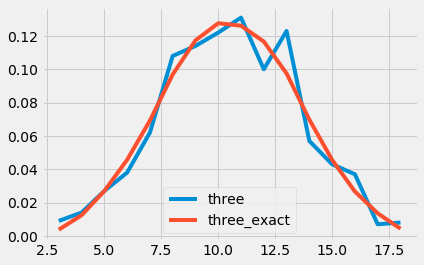

In [4]:
d6 = pd.Series(1.0, index=range(1,7))
dice = [d6] * 3

# simulation
three = get_sample_sum(dice, 1000)

# enumeration
one = get_sample_sum([d6], 1000)
three_exact = add_pmf(one, add_pmf(one, one))

three.plot(legend=True, label='three')
three_exact.plot(legend=True, label='three_exact')

In [5]:
def get_sample_max(pmf, samples, iters):
    pmf_max = pd.Series()
    for _ in range(iters):
        i = max(pmf.sample(n=samples, weights=pmf.values, replace=True).index)
        pmf_max.at[i] = pmf_max.get(i,0) + 1
    pmf_max.sort_index(inplace=True)
    pmf_max *= 1 / pmf_max.sum()
    return pmf_max.reindex(pmf.index, fill_value=0.0)
    
def get_max_pmf(pa, pb):
    pmf = pd.Series()
    for ai, av in pa.items():
        for bi, bv in pb.items():
            pmf.at[max(ai,bi)] = pmf.get(max(ai,bi),0) + av*bv
    pmf *= 1 / pmf.sum()
    return pmf

def get_max_cdf(pmf, k):
    cdf = pmf.cumsum()
    return pd.Series([p**k for p in cdf.values], index=cdf.index)

def pmf_from_cdf(cdf):
    pmf = pd.Series()
    prev = 0.0
    for i, v in cdf.items():
        pmf.at[i] = pmf.get(i,0) + v-prev
        prev = v
    return pmf


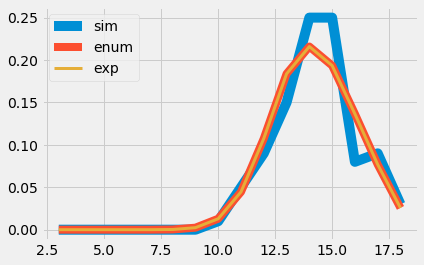

In [6]:
# simulation
three_max = get_sample_max(three_exact, 6, 100)

# enumeration
three_max_enum = get_max_pmf(get_max_pmf(three_exact, three_exact),
                             get_max_pmf(
                                 get_max_pmf(three_exact, three_exact),
                                 get_max_pmf(three_exact, three_exact)))

# exponentiation
three_max_exp = pmf_from_cdf(get_max_cdf(three_exact, 6))

three_max.plot(legend=True, label='sim', linewidth=10.0)
three_max_enum.plot(legend=True, label='enum', linewidth=8.0)
three_max_exp.plot(legend=True, label='exp', linewidth=3.0)